In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array
import os
import sys
import ROOT
from Plot_func import Plot_prof_Unit 
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
import sys 
import os
sys.path.append(os.path.abspath("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/"))
from fastSimulation import *

Welcome to JupyROOT 6.26/06


# Reading the files

In [2]:
folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/"
Recotype = "FullRecoInteraction"
Interaction = True
ParamType = "InRot"
Particletype = "_muon"
ParamStType = ""
if(ParamType=="InRot") : ParamStType = "NoRot"

sample = "Rangetest_"
inputData = folder+Recotype+"/fastParticle.list"
ROOT.initTreeFast(inputData)
tree = ROOT.treeFast
treeSeed = ROOT.treeSeed


Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root


## Unit Test

### Seed


 FCN=1955.6 FROM MIGRAD    STATUS=CONVERGED     108 CALLS         109 TOTAL
                     EDM=6.70417e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.47772e+02   1.40321e+01   1.64256e-01   3.74851e-05
   2  Mean         2.14872e-02   6.30156e-03   1.35966e-04   2.15721e-02
   3  Sigma        6.18981e-01   9.75636e-03   4.56702e-05   1.59209e-01
 FCN=1855.7 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=4.99272e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.67136e+02   6.60956e+00   9.50618e-02  -6.32518e-05
   2  Mean         3.57299e-02   1.00719e-02  -3.93098e-05   2.87354e-02
   3  Sigma        9.7

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitSeed2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitSeed3.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitSeed4.png has been created


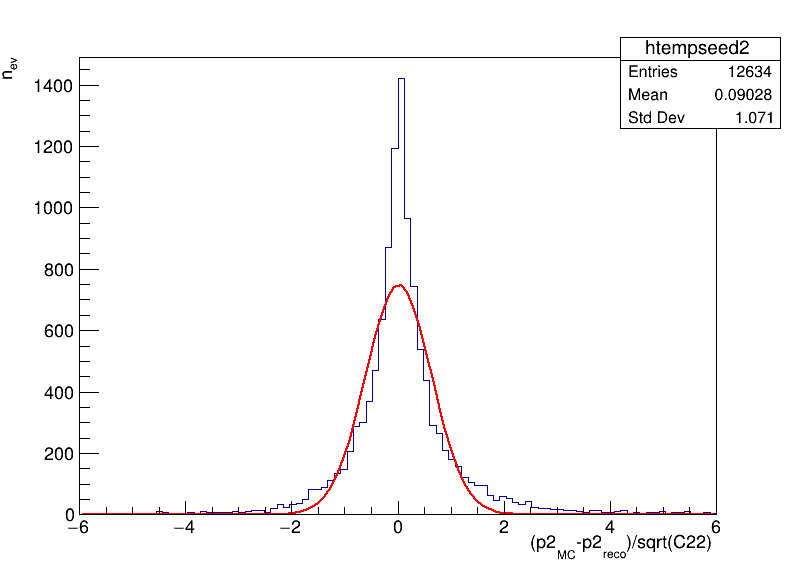

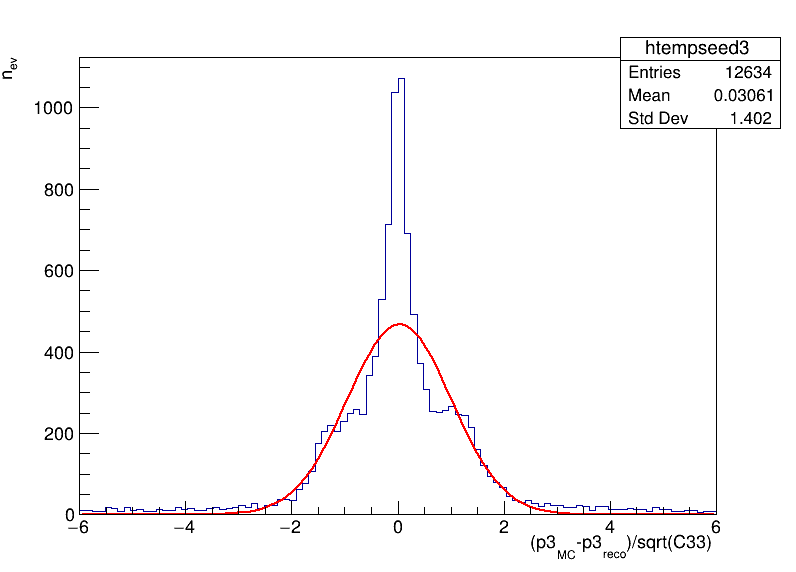

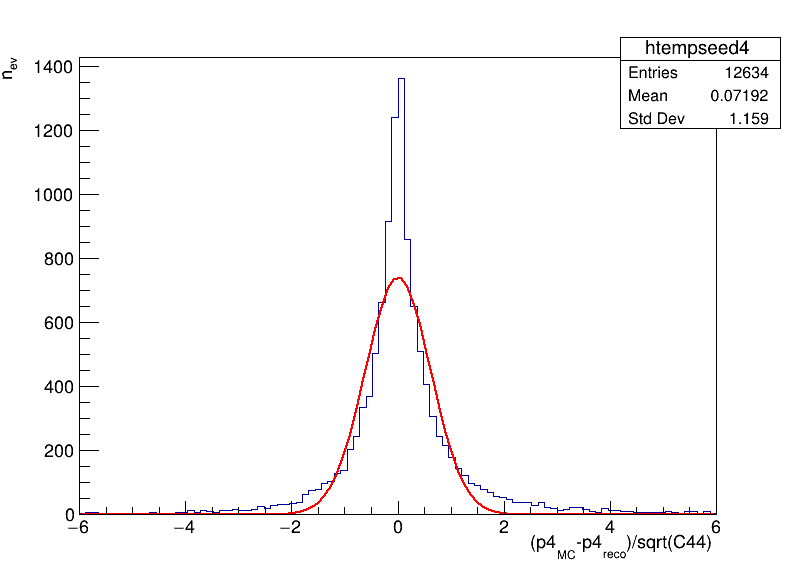

In [3]:

cseed2 = ROOT.TCanvas("cseed2","cseed2",800,600)
tree.SetAlias("unitSeed2","(part.fParamInRot[part.fParamInRot@.size()-1].fP[2]-part.fParamMC[part.fParamInRot@.size()-1].fP[2])/sqrt(part.fParamInRot[part.fParamInRot@.size()-1].fC[5]*0.5)")
tree.Draw("unitSeed2>>htempseed2(100,-6,6)","")
hseed2 = ROOT.gPad.GetPrimitive("htempseed2")
hseed2.SetTitle(";(p2_{MC}-p2_{reco})/sqrt(C22); n_{ev}")
hseed2.Fit("gaus")
hseed2.Draw()
cseed2.Draw()
cseed2.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitSeed2.png")


cseed3 = ROOT.TCanvas("cseed3","cseed3",800,600)
tree.SetAlias("unitSeed3","(part.fParamInRot[part.fParamInRot@.size()-1].fP[3]-part.fParamMC[part.fParamInRot@.size()-1].fP[3])/sqrt(part.fParamInRot[part.fParamInRot@.size()-1].fC[9]*0.5)")
tree.Draw("unitSeed3>>htempseed3(100,-6,6)","")
hseed3 = ROOT.gPad.GetPrimitive("htempseed3")
hseed3.SetTitle(";(p3_{MC}-p3_{reco})/sqrt(C33); n_{ev}")
hseed3.Fit("gaus")
hseed3.Draw()
cseed3.Draw()
cseed3.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitSeed3.png")


cseed4 = ROOT.TCanvas("cseed4","cseed4",800,600)
tree.SetAlias("unitSeed4","(part.fParamInRot[part.fParamInRot@.size()-1].fP[4]-part.fParamMC[part.fParamInRot@.size()-1].fP[4])/sqrt(part.fParamInRot[part.fParamInRot@.size()-1].fC[14]*0.5)")
tree.Draw("unitSeed4>>htempseed4(100,-6,6)","")
hseed4 = ROOT.gPad.GetPrimitive("htempseed4")
hseed4.SetTitle(";(p4_{MC}-p4_{reco})/sqrt(C44); n_{ev}")
hseed4.Fit("gaus")
hseed4.Draw()
cseed4.Draw()
cseed4.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitSeed4.png")

### Kalman Filter

 FCN=968.487 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=1.26492e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.34888e+02   6.59104e+00   6.50279e-02   4.00065e-06
   2  Mean         1.46437e-02   1.12122e-02   1.70157e-04   4.28241e-02
   3  Sigma        1.13786e+00   1.31150e-02   3.22298e-05  -4.90756e-02
 FCN=1005.4 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=2.08289e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.11783e+02   6.17365e+00   6.28161e-02   1.60354e-05
   2  Mean         1.57280e-01   1.20669e-02   1.82859e-04   4.48896e-02
   3  Sigma        1.19858e+00   1

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitKF2.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitKF3.png has been created
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/Rangetest_InRotUnitKF4.png has been created


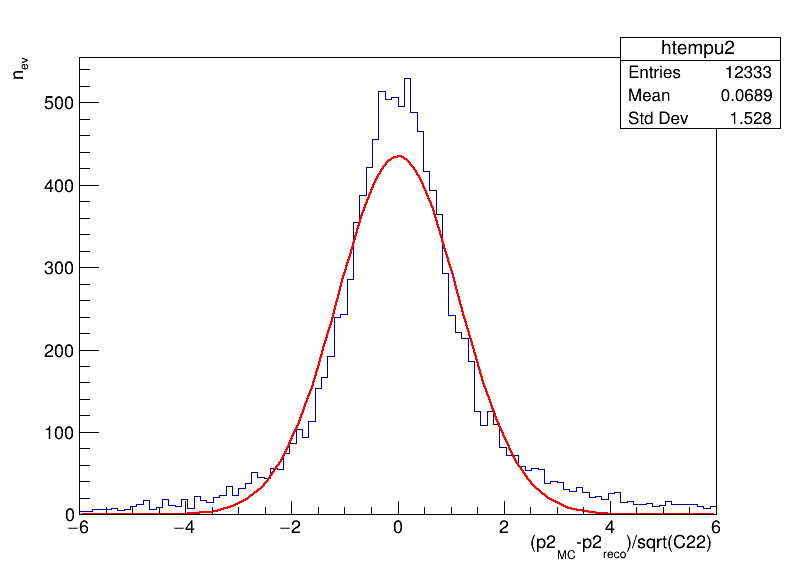

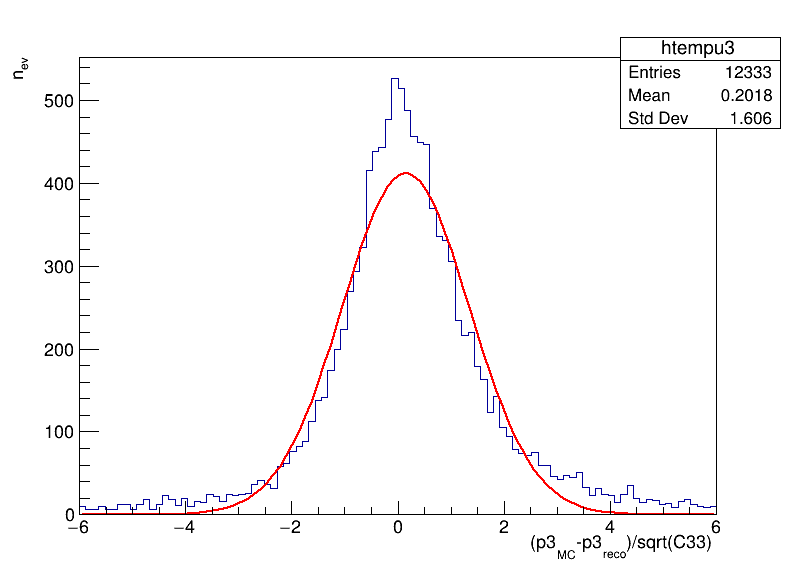

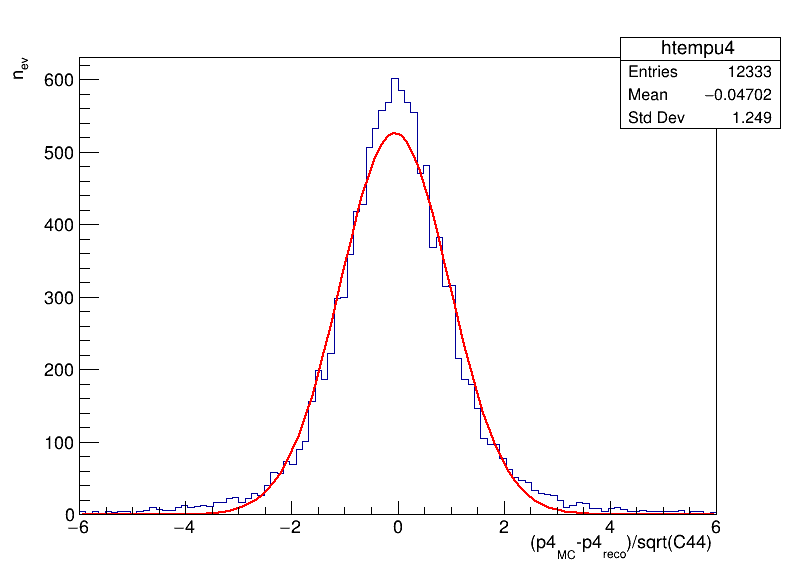

In [4]:
cu2 = ROOT.TCanvas("cu2","cu2",800,600)
tree.Draw("(part.fParamInRot[0].fP[2]-part.fParamMC[0].fP[2])/sqrt(part.fParamInRot[0].fC[5])>>htempu2(100,-6,6)","part.fParamInRot[0].fC[5]!=0&&fParamMC[0].fP[4]!=0")
hu2 = ROOT.gPad.GetPrimitive("htempu2")
hu2.SetTitle(";(p2_{MC}-p2_{reco})/sqrt(C22); n_{ev}")
hu2.Fit("gaus")
hu2.Draw()
cu2.Draw()
cu2.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitKF2.png")

cu3 = ROOT.TCanvas("cu3","cu3",800,600)
tree.Draw("(part.fParamInRot[0].fP[3]-part.fParamMC[0].fP[3])/sqrt(part.fParamInRot[0].fC[9])>>htempu3(100,-6,6)","part.fParamInRot[0].fC[9]!=0&&fParamMC[0].fP[4]!=0")
hu3 = ROOT.gPad.GetPrimitive("htempu3")
hu3.SetTitle(";(p3_{MC}-p3_{reco})/sqrt(C33); n_{ev}")
hu3.Fit("gaus")
hu3.Draw()
cu3.Draw()
cu3.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitKF3.png")

cu4 = ROOT.TCanvas("cu4","cu4",800,600)
tree.Draw("(part.fParamInRot[0].fP[4]-part.fParamMC[0].fP[4])/sqrt(part.fParamInRot[0].fC[14])>>htempu4(100,-6,6)","part.fParamInRot[0].fC[14]!=0&&fParamMC[0].fP[4]!=0")
hu4 = ROOT.gPad.GetPrimitive("htempu4")
hu4.SetTitle(";(p4_{MC}-p4_{reco})/sqrt(C44); n_{ev}")
hu4.Fit("gaus")
hu4.Draw()
cu4.Draw()
cu4.SaveAs(folder+Recotype+"/Plots/"+sample+ParamType+"UnitKF4.png")

## KF Pulls VS Variables

#### Pulls VS Length

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,50.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (50.000000,100.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (100.000000,150.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (150.000000,200.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (200.000000,250.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (250.000000,300.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (300.000000,350.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (350.000000,400.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (400.000000,450.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (450.000000,500.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (500.000000,550.000000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (550.000000,600.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (600.000000,650.000000)
Info in <TH2F::DoFitSlices>: Sl

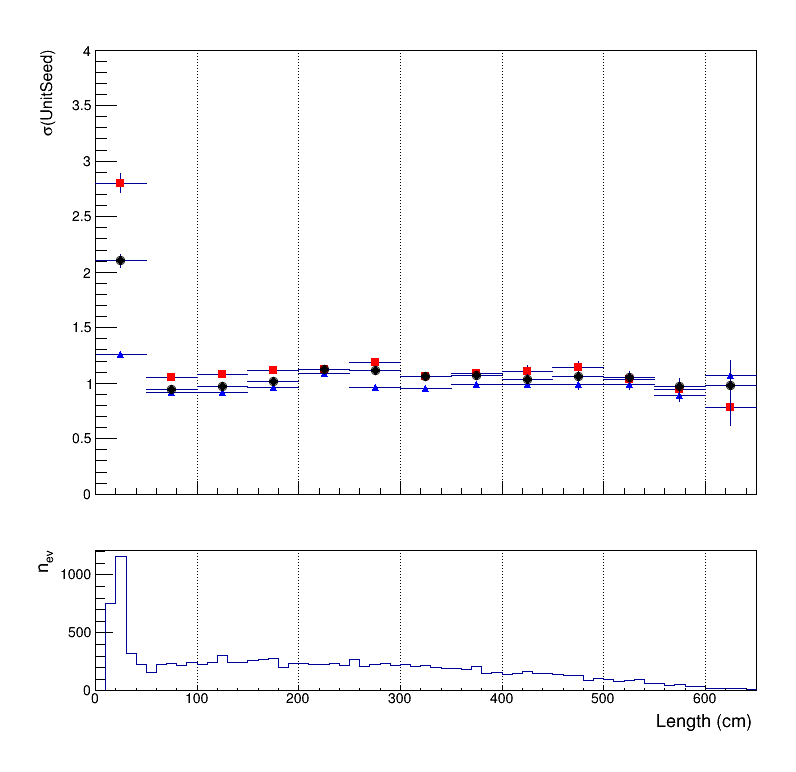

In [11]:
ParamType = "part.fParamInRot[0]"
ParamMCType = "part.fParamMC[0]"
Var = "part.fLengthInRot"
VarName = "Length (cm)"
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"KFPullsVsLength.png"
HistoXY = ["13,0,650","30,-0.5,0.5"]
HistoVarX = "80,250,500"
rangeuserYsigma = [0.0,]

if(Interaction):
    HistoXY = ["13,0,650","30,-6,6"]
    HistoVarX = "65,0,650"
    rangeuserYsigma = [0,4]

Plot_prof_Unit(tree,ParamType,ParamMCType,Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,rangeuserYsigma,savesigma)

#### Pulls VS LArm

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,25.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (25.000000,50.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (50.000000,75.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (75.000000,100.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (100.000000,125.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (125.000000,150.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (150.000000,175.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (175.000000,200.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (200.000000,225.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (225.000000,250.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (250.000000,275.000000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (275.000000,300.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (300.000000,325.000000)
Info in <TH2F::DoFitSlices>: Slice 

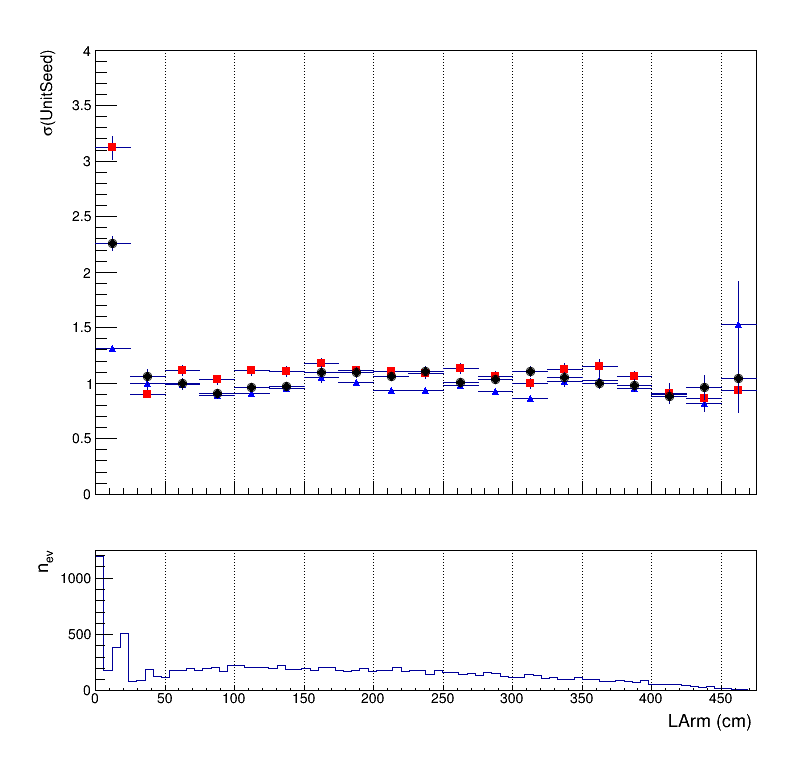

In [5]:
tree.SetAlias("yend","part.fParamMC[fParamMC@.size()-1].fX*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)+part.fParamMC[fParamMC@.size()-1].fP[0]*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("ystart","part.fParamMC[0].fX*sin(part.fParamMC[0].fAlpha)+part.fParamMC[0].fP[0]*cos(part.fParamMC[0].fAlpha)")
tree.SetAlias("xend","part.fParamMC[fParamMC@.size()-1].fX*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)-part.fParamMC[fParamMC@.size()-1].fP[0]*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("xstart","part.fParamMC[0].fX*cos(part.fParamMC[0].fAlpha)-part.fParamMC[0].fP[0]*sin(part.fParamMC[0].fAlpha)")
tree.SetAlias("lArmMC","sqrt((xend-xstart)*(xend-xstart)+(yend-ystart)*(yend-ystart))")

ParamType = "part.fParamInRot[0]"
ParamMCType = "part.fParamMC[0]"
Var = "lArmMC"
VarName = "LArm (cm)"
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"KFPullsVsLArm.png"
HistoXY = ["10,250,500","30,-0.5,0.5"]
HistoVarX = "80,250,500"
rangeuserYsigma = [0.0,]

if(Interaction):
    HistoXY = ["19,0,475","30,-6,6"]
    HistoVarX = "80,0,475"
    rangeuserYsigma = [0,4]

Plot_prof_Unit(tree,ParamType,ParamMCType,Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,rangeuserYsigma,savesigma)




#### Pulls VS NPoints

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,50.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (50.000000,100.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (100.000000,150.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (150.000000,200.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (200.000000,250.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (250.000000,300.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (300.000000,350.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (350.000000,400.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (400.000000,450.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (450.000000,500.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (500.000000,550.000000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (550.000000,600.000000)
Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the g

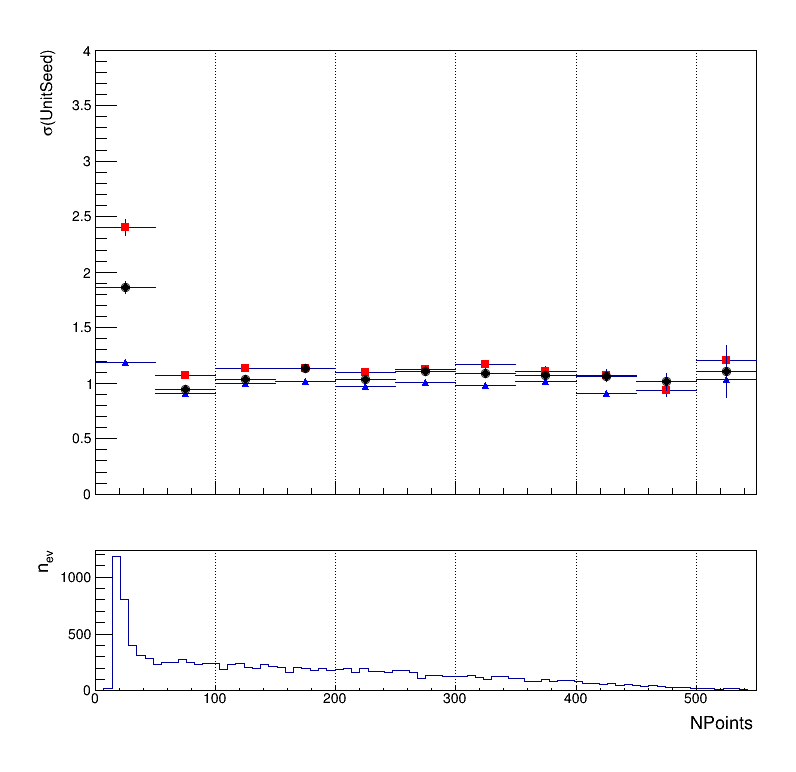

In [8]:
tree.SetAlias("NPoints","part.fParamMC@.size()")

ParamType = "part.fParamInRot[0]"
ParamMCType = "part.fParamMC[0]"
Var = "NPoints"
VarName = "NPoints"
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"KFPullsVsNPoints.png"
HistoXY = ["10,250,500","30,-0.5,0.5"]
HistoVarX = "80,250,550"
rangeuserYsigma = [0.0,]

if(Interaction):
    HistoXY = ["11,0,550","30,-6,6"]
    HistoVarX = "80,0,550"
    rangeuserYsigma = [0,4]

Plot_prof_Unit(tree,ParamType,ParamMCType,Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,rangeuserYsigma,savesigma)

### Pulls Vs Total Momentum

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (2.000000,2.500000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (2.500000,3.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (3.000000,3.500000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (3.500000,4.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (4.000000,4.500000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (4.500000,5.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (5.000000,5.500000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (5.500000,6.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (6.000000,6.500000)
Info in <TH2F::DoFitSlices>: Slice fit 14 (6.500000,7.000000)
Info in <TH2F::Do

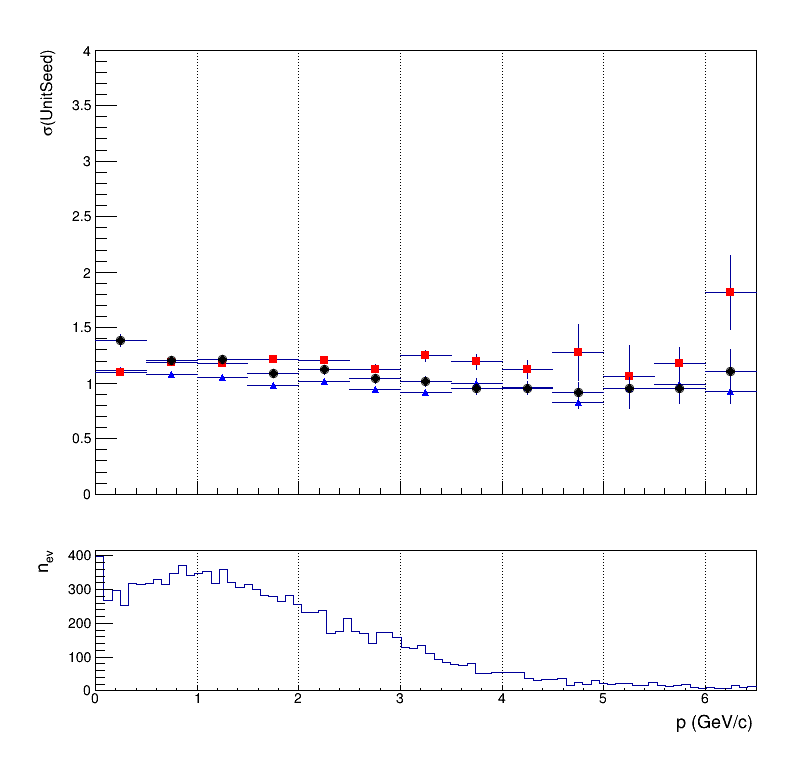

In [10]:
ParamType = "part.fParamInRot[0]"
ParamMCType = "part.fParamMC[0]"
Var = "part.fParamMC[0].GetP()"
VarName = "p (GeV/c)"
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"KFPullsVsTotalp.png"
HistoXY = ["10,250,500","30,-0.5,0.5"]
HistoVarX = "80,250,550"
rangeuserYsigma = [0.0,]

if(Interaction):
    HistoXY = ["13,0,6.5","30,-6,6"]
    HistoVarX = "80,0,6.5"
    rangeuserYsigma = [0,4]

Plot_prof_Unit(tree,ParamType,ParamMCType,Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,rangeuserYsigma,savesigma)

### Pulls VS pT

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (2.000000,2.500000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (2.500000,3.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (3.000000,3.500000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (3.500000,4.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (4.000000,4.500000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (4.500000,5.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (5.000000,5.500000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (5.500000,6.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (6.000000,6.500000)
Info in <TH2F::DoFitSlices>: Slice fit 14 (6.500000,7.000000)
Info in <TH2F::Do

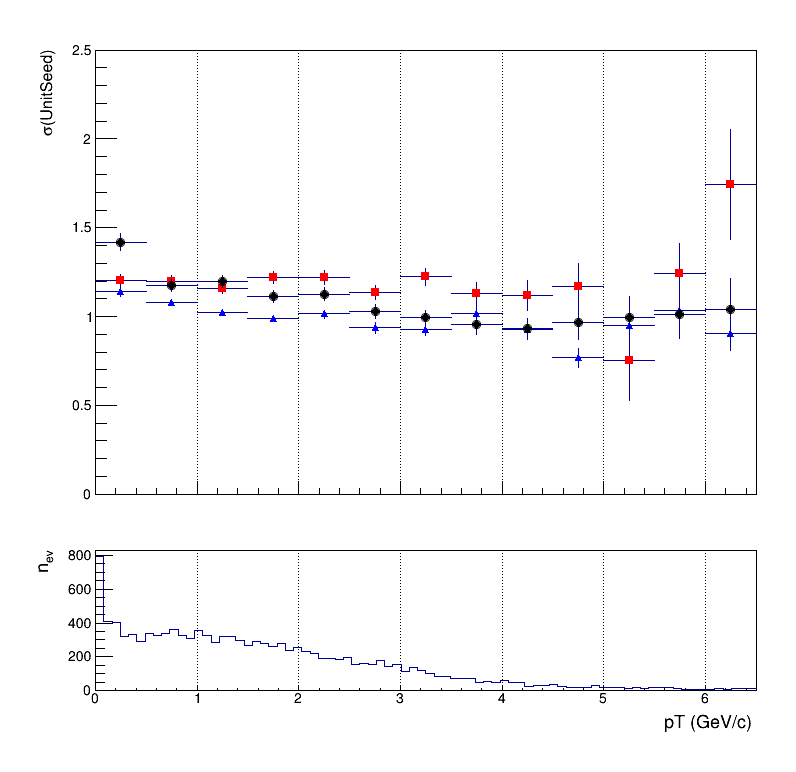

In [14]:
ParamType = "part.fParamInRot[0]"
ParamMCType = "part.fParamMC[0]"
Var = "1/abs(part.fParamMC[0].fP[4])"
VarName = "pT (GeV/c)"
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"KFPullsVspT.png"
HistoXY = ["10,250,500","30,-0.5,0.5"]
HistoVarX = "80,250,550"
rangeuserYsigma = [0.0,]

if(Interaction):
    HistoXY = ["13,0,6.5","30,-6,6"]
    HistoVarX = "80,0,6.5"
    rangeuserYsigma = [0,2.5]

Plot_prof_Unit(tree,ParamType,ParamMCType,Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,rangeuserYsigma,savesigma)